In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPool1D, ReLU, Flatten

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
samples_per_class = 5000
no_of_classes = 2

In [4]:
noise_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Data/Final_Merged_Noise_Reduced_No_Abs.csv", header=None)
noise_X = noise_df.values.astype(float)


data_df = pd.read_csv("/content/gdrive/MyDrive/GW_SOP/Data/Final_BBH_Merged_Noise_Signal_Reduced_No_ABS.csv", header=None)
data_X = data_df.values.astype(float)

In [8]:
X = np.concatenate((noise_X, data_X), axis=0)

print(len(noise_df.index))
print(X)

5000
[[-1.64907037e-19 -4.29360853e-20  3.12423747e-20 ... -2.04472673e-19
  -1.81142159e-19 -1.51305791e-20]
 [ 9.92276697e-20 -1.80029547e-19 -1.23077317e-19 ...  6.22533943e-20
  -9.09674752e-20  2.12523082e-19]
 [-6.44325773e-21  5.41100166e-20 -6.99219049e-20 ... -1.41370244e-20
  -3.97475053e-20 -7.86069176e-20]
 ...
 [ 7.76972601e-20  3.20836763e-19  3.14578215e-19 ...  2.35714024e-19
   6.00128059e-21  2.16913004e-20]
 [-4.49084936e-20  1.51921233e-19  6.06093593e-20 ...  4.94761107e-20
   7.05876197e-20 -6.05955651e-20]
 [ 2.26450657e-19  2.98039252e-19  2.09974247e-19 ... -5.85071682e-20
   1.08575973e-19 -4.63715638e-20]]


In [9]:
# Alternate way of creating y for the dataset
 
y = [int(i/samples_per_class) for i in range(samples_per_class*no_of_classes)]
y = tf.keras.utils.to_categorical(y)
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01, random_state=1)

In [11]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(9900, 16384) (100, 16384) (9900, 2) (100, 2)


In [ ]:
# scaler = StandardScaler()
# scaled_X = scaler.fit_transform(X)
# print(scaled_X)

[[-4.66502223e-01 -1.07359821e+00 -1.74433671e+00 ...  5.02581170e-01
  -1.36933782e+00  2.26637884e-01]
 [ 1.12471825e+00  7.27310905e-01 -1.06618344e-03 ...  4.98396855e-01
   4.52394582e-01 -1.06678426e+00]
 [ 2.86896372e-01  2.82565906e-01  3.98155846e-01 ...  1.20432591e-01
  -1.07508789e+00 -1.62151193e+00]
 ...
 [-6.68001951e-02  1.60138337e-01  1.04733176e+00 ... -1.48016600e+00
  -1.07543938e+00  2.95662405e-01]
 [-1.66927888e+00 -5.67844024e-01 -1.95661364e+00 ...  3.33327448e-01
   5.95383678e-01 -1.42522492e+00]
 [-3.17754987e-01 -1.93968081e-01 -6.12621844e-01 ... -1.12467792e+00
   7.56003017e-01 -2.12316594e-01]]


In [12]:
X_train_1 = np.expand_dims(X_train, axis=-1)
# X_val_1 = np.expand_dims(X_val, axis=-1)

In [2]:
model = Sequential()

model.add(Conv1D(64, 32, input_shape = (16384,1)))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(128, 64))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(256, 64))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Conv1D(512, 128))
model.add(MaxPool1D(4, 4))
model.add(ReLU())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))                         # dropout rate not givem
model.add(Dense(2, activation=tf.nn.softmax))

# learning rate not given
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16353, 64)         2112      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4088, 64)          0         
_________________________________________________________________
re_lu (ReLU)                 (None, 4088, 64)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4025, 128)         524416    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1006, 128)         0         
_________________________________________________________________
re_lu_1 (ReLU)               (None, 1006, 128)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 943, 256)          2

In [14]:
history = model.fit(X_train_1, y_train, batch_size=128, epochs=10) #, validation_data=(X_val_1, y_val)

Epoch 1/10
78/78 [==============================] - 66s 618ms/step - loss: 0.6962 - accuracy: 0.5041
Epoch 2/10
78/78 [==============================] - 43s 551ms/step - loss: 0.6938 - accuracy: 0.4978
Epoch 3/10
78/78 [==============================] - 44s 559ms/step - loss: 0.6935 - accuracy: 0.4979
Epoch 4/10
78/78 [==============================] - 44s 564ms/step - loss: 0.6948 - accuracy: 0.4933
Epoch 5/10
78/78 [==============================] - 44s 567ms/step - loss: 0.6937 - accuracy: 0.5045
Epoch 6/10
78/78 [==============================] - 45s 572ms/step - loss: 0.6935 - accuracy: 0.4971
Epoch 7/10
78/78 [==============================] - 45s 578ms/step - loss: 0.6934 - accuracy: 0.4982
Epoch 8/10
78/78 [==============================] - 45s 579ms/step - loss: 0.6936 - accuracy: 0.4973
Epoch 9/10
78/78 [==============================] - 45s 579ms/step - loss: 0.6934 - accuracy: 0.4961
Epoch 10/10
78/78 [==============================] - 45s 579ms/step - loss: 0.6937 - accura

In [15]:
# import ctypes
# history = tf.keras.callbacks.History()
# history = ctypes.cast(0x7fc8cb74af50, ctypes.py_object).value

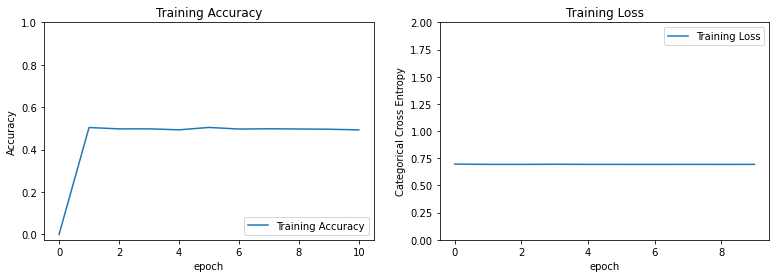

In [16]:
import matplotlib.pyplot as plt

acc = [0.] + history.history['accuracy']

loss = history.history['loss']

plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross Entropy')
plt.ylim([0,2])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()